In [ ]:
# install the kaggle API
!pip install -q kaggle
from google.colab import drive
import os
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
!pip install -q kaggle
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adevkp","key":"9dd6592fa85ed4071247998169250762"}'}

In [ ]:
# create a kaggle directory
!mkdir ~/.kaggle

In [ ]:
# move the token into the kaggle directory
!mv /content/kaggle.json ~/.kaggle/

In [ ]:
# change the permisions of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 # test it out
 !kaggle datasets list

ref                                                           title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                                9MB  2023-03-20 15:43:25           3559        137  1.0              
ashishraut64/global-methane-emissions                         Global Emissions.                                 31KB  2023-03-27 09:02:51            892         30  1.0              
thitiwat/top-100-most-expensive-football-transfers            ⚽ Top 100 most expensive football transfers        2KB  2023-03-27 04:06:28            598         25  1.0              
davidms8/product-sales-detail                                 Product Sales - Detail 

###  Get the dataset

In [ ]:
# start the download
!kaggle datasets download 'nikhilpandey360/chest-xray-masks-and-labels'

100% 9.58G/9.58G [08:13<00:00, 20.7MB/s]
100% 9.58G/9.58G [08:13<00:00, 20.8MB/s]


In [ ]:
%mkdir dataset
%mkdir dataset/images # for source images
%mkdir dataset/masks # for annotation masks
%mkdir dataset/test # for test images
%mkdir dataset/temp # temp storage

In [ ]:
!unzip chest-xray-masks-and-labels.zip -d dataset/temp/

Archive:  chest-xray-masks-and-labels.zip
  inflating: dataset/temp/Lung Segmentation/.ipynb_checkpoints/Montgomery-checkpoint.ipynb  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0001_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0002_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0003_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0004_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0005_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0006_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0007_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0008_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0009_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0010_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0011_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0012_0.png  
 

In [ ]:
# remove the original zip file
%rm chest-xray-masks-and-labels.zip

In [ ]:
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/images/
IMAGE_PATH = "/content/dataset/images/"

In [ ]:
%mv dataset/temp/Lung\ Segmentation/masks/* dataset/masks/
MASK_PATH = '/content/dataset/masks/'

In [ ]:
%mv dataset/temp/Lung\ Segmentation/test/* dataset/test/
TEST_PATH = '/content/dataset/test/'

In [ ]:
# clean-up
%rm -r dataset/temp/

In [ ]:
# importing os module
import os

# suffix cropping function
def rchop(s, suffix):
    if suffix and s.endswith(suffix):
        return s[:-len(suffix)]
    return s

suffix = "_mask.png"

# iterate over all mask images and edit the file-names
for count, filename in enumerate(os.listdir("/content/dataset/masks")):
  src = "/content/dataset/masks/" + filename
  res = rchop(src, suffix)
  dst = ""
  if src != res:
    dst = rchop(src, suffix) + ".png"
    os.rename(src, dst)

In [ ]:
# check the number of files in the images/ and masks/ directories
import os.path

print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))

number of files in images/ directory: 800
number of files in masks/ directory: 704


In [ ]:
# function to confirm the existence of a file in a given directory
def searchFile(fileName, TARGET_PATH):
  for root, dirs, files in os.walk(TARGET_PATH):
    for Files in files:
      #print(Files)
      found = Files.find(fileName)
      if found != -1:
        break
  return found

In [ ]:
%mkdir /content/dataset/orphan_images

In [ ]:
# clean up the images/ directory by removing all images that do not have a mask
import shutil

cnt = 0

for count, filename in enumerate(os.listdir("/content/dataset/images")):
  found = searchFile(filename, MASK_PATH)
  if found == -1:
    cnt = cnt + 1
    src = "/content/dataset/images/" + filename
    dst = "/content/dataset/orphan_images/" + filename
    dest = shutil.move(src, dst)
print("number of files not matched: " + str(cnt))

number of files not matched: 96


In [ ]:
# confirm consistency
print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))

number of files in images/ directory: 704
number of files in masks/ directory: 704


In [ ]:
import cv2

for count, filename in enumerate(os.listdir("/content/dataset/masks")):
  src = "/content/dataset/masks/" + filename
  img = cv2.imread(src, cv2.IMREAD_GRAYSCALE)
  (T, res) = cv2.threshold(img, 0, 1, cv2.THRESH_BINARY)
  cv2.imwrite(src, res)

In [ ]:
!git clone https://github.com/georgiosouzounis/semantic-segmentation-tf2.git

Cloning into 'semantic-segmentation-tf2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 36 (delta 2), reused 32 (delta 2), pack-reused 0
Receiving objects: 100% (36/36), 29.20 KiB | 2.43 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
%cd semantic-segmentation-tf2/

/content/semantic-segmentation-tf2


## Create the model <a name="create-the-model"></a>

In [ ]:
# check the image attributes
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/dataset/test/CHNCXR_0194_0.png")
img.shape

(2992, 2991, 3)

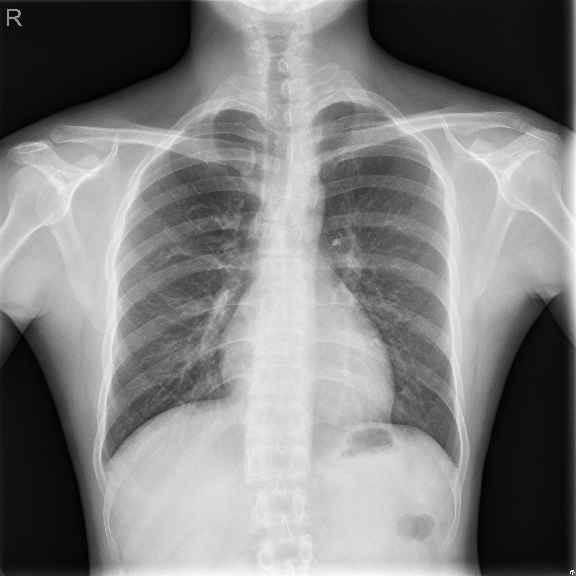

In [ ]:
img = cv2.resize(img, (576, 576))
cv2_imshow(img)

In [ ]:
# import the vgg_unet model
from tf2_sem_seg.models.unet import unet_mini,unet,vgg_unet,resnet50_unet,mobilenet_unet

In [ ]:
# instantiate our model:
# + n_classes = 1 (background) + 1 (lungs)
# + input_height: resized number of rows for input image; must be divisable by 32
# + input_width:  resized number of cols for input image; must be divisable by 32
model1 = unet_mini(n_classes=2, input_height=576, input_width=576)
model2 = unet(n_classes=2, input_height=576, input_width=576)
model3 = vgg_unet(n_classes=2, input_height=576, input_width=576)
model4 = resnet50_unet(n_classes=2, input_height=576, input_width=576)
model5 = mobilenet_unet(n_classes=2, input_height=576, input_width=576)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# review the model
print(model1.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 576, 576, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 576, 576, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 576, 576, 32  0           ['conv2d[0][0]']                 
                                )                                                           

In [ ]:
print(model2.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 576, 576, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 578, 578, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 576, 576, 64  1792        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
print(model3.summary())

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 576, 576, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 576, 576, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 576, 576, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

In [ ]:
print(model4.summary())

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 576, 576, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_13 (ZeroPadding  (None, 582, 582, 3)  0          ['input_4[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1 (Conv2D)                 (None, 288, 288, 64  9472        ['zero_padding2d_13[0][0]']      
                                )                                                          

In [ ]:
print(model5.summary())

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 576, 576, 3  0           []                               
                                )]                                                                
                                                                                                  


In [ ]:
# review the model
from keras.utils.vis_utils import plot_model

In [ ]:
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

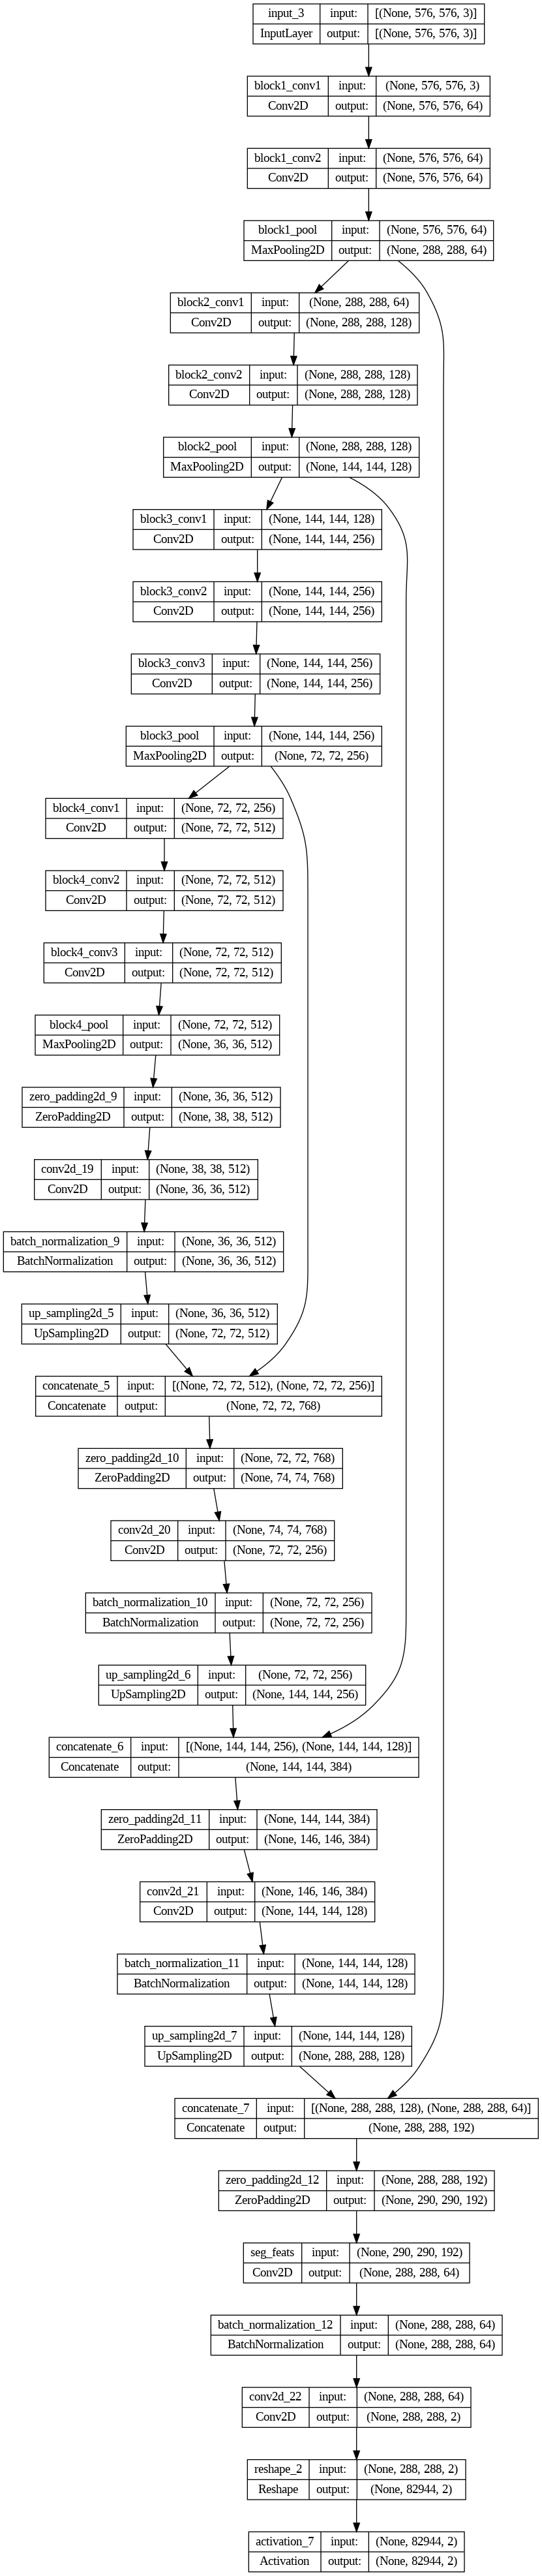

In [ ]:
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
plot_model(model4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
plot_model(model5, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Train the model <a name="train-the-model"></a>

In [ ]:
# create a temporary directory for model checkpoints
%mkdir /content/tmp/

In [ ]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# train_images: directory containing the source images for training
# train_annotations: directory containing the masks for training
# checkpoints_path: directory for storing weights and logs
# epochs: the number of training epochs set to 5 for the demo.
#   Increase this to a higher number for better results.
model1.train(
    train_images =  "../dataset/images/",
    train_annotations = "../dataset/masks/",
    checkpoints_path = "/content/gdrive/MyDrive/MedicalImaging1.2/Models/unet_mini/weights" , epochs=20
)

NameError: ignored

In [ ]:
model2.train(
    train_images =  "../dataset/images/",
    train_annotations = "../dataset/masks/",
    checkpoints_path = "/content/gdrive/MyDrive/MedicalImaging1.2/Models/unet/weights" , epochs=20
)

Verifying training dataset


100%|██████████| 704/704 [02:31<00:00,  4.65it/s]


Dataset verified! 
Epoch 1/20
512/512 [==============================] - ETA: 0s - loss: 0.1814 - accuracy: 0.9368
Epoch 1: saving model to /content/gdrive/MyDrive/MedicalImaging1.2/Models/unet/weights.00001
512/512 [==============================] - 260s 468ms/step - loss: 0.1814 - accuracy: 0.9368
Epoch 2/20
512/512 [==============================] - ETA: 0s - loss: 0.1001 - accuracy: 0.9638
Epoch 2: saving model to /content/gdrive/MyDrive/MedicalImaging1.2/Models/unet/weights.00002
512/512 [==============================] - 233s 456ms/step - loss: 0.1001 - accuracy: 0.9638
Epoch 3/20
512/512 [==============================] - ETA: 0s - loss: 0.0763 - accuracy: 0.9726
Epoch 3: saving model to /content/gdrive/MyDrive/MedicalImaging1.2/Models/unet/weights.00003
512/512 [==============================] - 232s 452ms/step - loss: 0.0763 - accuracy: 0.9726
Epoch 4/20
512/512 [==============================] - ETA: 0s - loss: 0.0827 - accuracy: 0.9708
Epoch 4: saving model to /content/gdriv

In [ ]:
model3.train(
    train_images =  "../dataset/images/",
    train_annotations = "../dataset/masks/",
    checkpoints_path = "/content/gdrive/MyDrive/MedicalImaging1.2/Models/vgg_unet/weights" , epochs=20
)

In [ ]:
model4.train(
    train_images =  "../dataset/images/",
    train_annotations = "../dataset/masks/",
    checkpoints_path = "/content/gdrive/MyDrive/MedicalImaging1.2/Models/resnet50_unet/weights" , epochs=20
)

Verifying training dataset


100%|██████████| 704/704 [02:35<00:00,  4.53it/s]


Dataset verified! 
Epoch 1/20
512/512 [==============================] - ETA: 0s - loss: 0.0884 - accuracy: 0.9694
Epoch 1: saving model to /content/gdrive/MyDrive/MedicalImaging1.2/Models/resnet50_unet/weights.00001
512/512 [==============================] - 308s 503ms/step - loss: 0.0884 - accuracy: 0.9694
Epoch 2/20
512/512 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9803
Epoch 2: saving model to /content/gdrive/MyDrive/MedicalImaging1.2/Models/resnet50_unet/weights.00002
512/512 [==============================] - 239s 467ms/step - loss: 0.0552 - accuracy: 0.9803
Epoch 3/20
512/512 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9816
Epoch 3: saving model to /content/gdrive/MyDrive/MedicalImaging1.2/Models/resnet50_unet/weights.00003
512/512 [==============================] - 237s 463ms/step - loss: 0.0504 - accuracy: 0.9816
Epoch 4/20
512/512 [==============================] - ETA: 0s - loss: 0.0495 - accuracy: 0.9816
Epoch 4: sav

In [ ]:
model5.train(
    train_images =  "../dataset/images/",
    train_annotations = "../dataset/masks/",
    checkpoints_path = "/content/gdrive/MyDrive/MedicalImaging1.2/Models/mobilenet_unet/weights" , epochs=20
)

Verifying training dataset


100%|██████████| 704/704 [02:38<00:00,  4.44it/s]


Dataset verified! 
Epoch 1/20
512/512 [==============================] - ETA: 0s - loss: 0.0659 - accuracy: 0.9763
Epoch 1: saving model to /content/gdrive/MyDrive/MedicalImaging1.2/Models/mobilenet_unet/weights.00001
512/512 [==============================] - 264s 472ms/step - loss: 0.0659 - accuracy: 0.9763
Epoch 2/20
512/512 [==============================] - ETA: 0s - loss: 0.0478 - accuracy: 0.9819
Epoch 2: saving model to /content/gdrive/MyDrive/MedicalImaging1.2/Models/mobilenet_unet/weights.00002
512/512 [==============================] - 236s 461ms/step - loss: 0.0478 - accuracy: 0.9819
Epoch 3/20
512/512 [==============================] - ETA: 0s - loss: 0.0461 - accuracy: 0.9823
Epoch 3: saving model to /content/gdrive/MyDrive/MedicalImaging1.2/Models/mobilenet_unet/weights.00003
512/512 [==============================] - 240s 469ms/step - loss: 0.0461 - accuracy: 0.9823
Epoch 4/20
512/512 [==============================] - ETA: 0s - loss: 0.0383 - accuracy: 0.9847
Epoch 4: 

## Inference on test images <a name="inference-on-test-images"></a>

In [ ]:
#choosing a random image
img = cv2.imread("/content/dataset/test/CHNCXR_0195_0.png")

# for weight_no in range(1,21):
#   if(weight_no < 10):
#     model1.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/unet_mini/weights.0000{weight_no}")
#   else:
#     model1.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/unet_mini/weights.000{weight_no}")
#   out = model1.predict_segmentation(inp=img,out_fname="/content/test.png",overlay_img=True, show_legends=False)
#   img2 = cv2.imread("/content/test.png")
#   cv2.imwrite(os.path.join("/content/gdrive/MyDrive/MedicalImaging1.2/testImages/unet_mini" , f'{weight_no}.png'), img2)

# for weight_no in range(1,21):
#   if(weight_no < 10):
#     model2.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/unet/weights.0000{weight_no}")
#   else:
#     model2.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/unet/weights.000{weight_no}")
#   out = model2.predict_segmentation(inp=img,out_fname="/content/test.png",overlay_img=True, show_legends=False)
#   img2 = cv2.imread("/content/test.png")
#   cv2.imwrite(os.path.join("/content/gdrive/MyDrive/MedicalImaging1.2/testImages/unet" , f'{weight_no}.png'), img2)

# for weight_no in range(1,21):
#   if(weight_no < 10):
#     model3.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/vgg_unet/weights.0000{weight_no}")
#   else:
#     model3.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/vgg_unet/weights.000{weight_no}")
#   out = model3.predict_segmentation(inp=img,out_fname="/content/test.png",overlay_img=True, show_legends=False)
#   img2 = cv2.imread("/content/test.png")
#   cv2.imwrite(os.path.join("/content/gdrive/MyDrive/MedicalImaging1.2/testImages/vgg_unet" , f'{weight_no}.png'), img2)

# for weight_no in range(1,21):
#   if(weight_no < 10):
#     model4.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/resnet50_unet/weights.0000{weight_no}")
#   else:
#     model4.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/resnet50_unet/weights.000{weight_no}")
#   out = model4.predict_segmentation(inp=img,out_fname="/content/test.png",overlay_img=True, show_legends=False)
#   img2 = cv2.imread("/content/test.png")
#   cv2.imwrite(os.path.join("/content/gdrive/MyDrive/MedicalImaging1.2/testImages/resnet50_unet" , f'{weight_no}.png'), img2)

for weight_no in range(1,21):
  if(weight_no < 10):
    model5.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/mobilenet_unet/weights.0000{weight_no}")
  else:
    model5.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/mobilenet_unet/weights.000{weight_no}")
  out = model5.predict_segmentation(inp=img,out_fname="/content/test.png",overlay_img=True, show_legends=False)
  img2 = cv2.imread("/content/test.png")
  cv2.imwrite(os.path.join("/content/gdrive/MyDrive/MedicalImaging1.2/testImages/mobilenet_unet" , f'{weight_no}.png'), img2)

1/1 [==============================] - 0s 38ms/step


In [ ]:
# alpha-blend the inference with the source
# o = model.predict_segmentation(
#     inp="/content/dataset/test/CHNCXR_0025_0.png",
#     out_fname="/content/tmp/out_blend.png" , overlay_img=True, show_legends=True,
#     class_names = ["background","lungs"]
# )

1/1 [==============================] - 0s 18ms/step


**Save Segmented Files to Drive**

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras import preprocessing
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

# from keras.preprocessing.image import img_to_array, load_img

# Step 1: Mount your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')



model1.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/unet_mini/weights.00018")
for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images"):
  out1 = model1.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/unet_mini/Tuberculosis XRays (Schenzen)/images/images/"+filename,overlay_img=True, show_legends=False)
# for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Pneumonia"):
#   out2 = model1.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Pneumonia/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/unet_mini/Pneumonia/"+filename,overlay_img=True, show_legends=False)
# for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis"):
#   out3 = model1.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/unet_mini/Tuberculosis/"+filename,overlay_img=True, show_legends=False)


model2.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/unet/weights.00010")
for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images"):
  out1 = model2.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/unet/Tuberculosis XRays (Schenzen)/images/images/"+filename,overlay_img=True, show_legends=False)
# for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Pneumonia"):
#   out2 = model2.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Pneumonia/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/unet/Pneumonia/"+filename,overlay_img=True, show_legends=False)
# for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis"):
#   out3 = model2.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/unet/Tuberculosis/"+filename,overlay_img=True, show_legends=False)

model3.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/vgg_unet/weights.00014")
for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images"):
  out1 = model3.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/vgg_unet/Tuberculosis XRays (Schenzen)/images/images/"+filename,overlay_img=True, show_legends=False)
# for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Pneumonia"):
#   out2 = model3.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Pneumonia/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/vgg_unet/Pneumonia/"+filename,overlay_img=True, show_legends=False)
# for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis"):
#   out3 = model3.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/vgg_unet/Tuberculosis/"+filename,overlay_img=True, show_legends=False)

model4.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/resnet50_unet/weights.00014")
for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images"):
  out1 = model4.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/resnet50_unet/Tuberculosis XRays (Schenzen)/images/images/"+filename,overlay_img=True, show_legends=False)
# for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Pneumonia"):
#   out2 = model4.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Pneumonia/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/resnet50_unet/Pneumonia/"+filename,overlay_img=True, show_legends=False)
# for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis"):
#   out3 = model4.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/resnet50_unet/Tuberculosis/"+filename,overlay_img=True, show_legends=False)

model5.load_weights(f"/content/gdrive/MyDrive/MedicalImaging1.2/Models/mobilenet_unet/weights.00019")
for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images"):
  out1 = model5.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/mobilenet_unet/Tuberculosis XRays (Schenzen)/images/images/"+filename,overlay_img=True, show_legends=False)
# for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Pneumonia"):
#   out2 = model5.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Pneumonia/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/mobilenet_unet/Pneumonia/"+filename,overlay_img=True, show_legends=False)
# for filename in os.listdir("/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis"):
#   out3 = model5.predict_segmentation(inp="/content/gdrive/MyDrive/MedicalImaging1.2/UnsegmentedData/Tuberculosis/"+filename,out_fname="/content/gdrive/MyDrive/MedicalImaging1.2/SegmentedData/mobilenet_unet/Tuberculosis/"+filename,overlay_img=True, show_legends=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


NotFoundError: ignored

In [ ]:
!pip install autokeras
import autokeras as ak

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras import preprocessing
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

# from keras.preprocessing.image import img_to_array, load_img

# Step 1: Mount your Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:

model1.load_weights(f"/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/Models/unet_mini/weights.00018")
for filename in os.listdir("/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images"):
  out1 = model1.predict_segmentation(inp="/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images/"+filename,out_fname="/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/SegmentedData/unet_mini/Tuberculosis XRays (Schenzen)/images/images/"+filename,overlay_img=True, show_legends=False)

model2.load_weights(f"/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/Models/unet/weights.00010")
for filename in os.listdir("/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images"):
  out1 = model2.predict_segmentation(inp="/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images/"+filename,out_fname="/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/SegmentedData/unet/Tuberculosis XRays (Schenzen)/images/images/"+filename,overlay_img=True, show_legends=False)

model3.load_weights(f"/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/Models/vgg_unet/weights.00014")
for filename in os.listdir("/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images"):
  out1 = model3.predict_segmentation(inp="/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images/"+filename,out_fname="/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/SegmentedData/vgg_unet/Tuberculosis XRays (Schenzen)/images/images/"+filename,overlay_img=True, show_legends=False)

model4.load_weights(f"/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/Models/resnet50_unet/weights.00014")
for filename in os.listdir("/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images"):
  out1 = model4.predict_segmentation(inp="/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images/"+filename,out_fname="/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/SegmentedData/resnet50_unet/Tuberculosis XRays (Schenzen)/images/images/"+filename,overlay_img=True, show_legends=False)

model5.load_weights(f"/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/Models/mobilenet_unet/weights.00019")
for filename in os.listdir("/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images"):
  out1 = model5.predict_segmentation(inp="/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/images/images/"+filename,out_fname="/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/SegmentedData/mobilenet_unet/Tuberculosis XRays (Schenzen)/images/images/"+filename,overlay_img=True, show_legends=False)


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split

# Set the path to the root directory of your dataset and the CSV file
data_dir = "/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/SegmentedData/vgg_unet/Tuberculosis XRays (Schenzen)/images/images/"
csv_file = "/content/gdrive/MyDrive/Research Projects/adhithya_research/MedicalImaging1.2/UnsegmentedData/Tuberculosis XRays (Schenzen)/shenzhen_metadata.csv"

image_size = (150, 150)
batch_size = 32

# Read the CSV file
metadata_df = pd.read_csv(csv_file)

# Combine all other labels into the TB category
metadata_df['findings'] = metadata_df['findings'].apply(lambda x: 'TB' if x != 'normal' else x)

# Number of classes after combining labels (normal and TB)
num_classes = len(metadata_df['findings'].unique())

# Split the data into training and validation sets
train_df, val_df = train_test_split(metadata_df, test_size=0.2, random_state=42)

def recall(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + tf.keras.backend.epsilon())

# Data preprocessing and augmentation
data_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = data_gen.flow_from_dataframe(
    dataframe=train_df,
    directory=data_dir,
    x_col='study_id',
    y_col='findings',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=list(metadata_df['findings'].unique())
)

validation_generator = data_gen.flow_from_dataframe(
    dataframe=val_df,
    directory=data_dir,
    x_col='study_id',
    y_col='findings',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=list(metadata_df['findings'].unique())
)

epochs = 20
# # Build the CNN model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[recall])

# Train the model

# history = model.fit(
#     train_generator,
#     epochs=epochs,
#     validation_data=validation_generator
# )

# # Plot training and validation accuracy
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


Found 506 validated image filenames belonging to 2 classes.
Found 130 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 23 invalid image filename(s) in x_col="study_id". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3 invalid image filename(s) in x_col="study_id". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
# get the whole dataset from the generator,
# generator causing issues in automl, dont need to pass data in batches.

import numpy as np

# Get the total number of samples in the training dataset
num_samples = len(train_df)

# Initialize empty arrays to store the data
x_train = np.empty((num_samples,) + image_size + (3,), dtype=np.float32)
y_train = np.empty((num_samples, num_classes), dtype=np.float32)

# Iterate through the generator to collect the data
batch_index = 0
for x_batch, y_batch in train_generator:
    batch_size = len(x_batch)
    if batch_index + batch_size <= num_samples:
        x_train[batch_index : batch_index + batch_size] = x_batch
        y_train[batch_index : batch_index + batch_size] = y_batch
        batch_index += batch_size
    else:
        remaining_samples = num_samples - batch_index
        x_train[batch_index : batch_index + remaining_samples] = x_batch[:remaining_samples]
        y_train[batch_index : batch_index + remaining_samples] = y_batch[:remaining_samples]
        break

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


In [ ]:
# Get the total number of samples in the validation dataset
num_val_samples = len(val_df)

# Initialize empty arrays to store the validation data
x_val = np.empty((num_val_samples,) + image_size + (3,), dtype=np.float32)
y_val = np.empty((num_val_samples, num_classes), dtype=np.float32)

# Iterate through the generator to collect the validation data
val_batch_index = 0
for x_batch_val, y_batch_val in validation_generator:
    val_batch_size = len(x_batch_val)
    if val_batch_index + val_batch_size <= num_val_samples:
        x_val[val_batch_index : val_batch_index + val_batch_size] = x_batch_val
        y_val[val_batch_index : val_batch_index + val_batch_size] = y_batch_val
        val_batch_index += val_batch_size
    else:
        remaining_val_samples = num_val_samples - val_batch_index
        x_val[val_batch_index : val_batch_index + remaining_val_samples] = x_batch_val[:remaining_val_samples]
        y_val[val_batch_index : val_batch_index + remaining_val_samples] = y_batch_val[:remaining_val_samples]
        break

print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

In [ ]:

# # just the masks in images
# # Get the total number of samples in the training dataset

# num_samples = len(train_df)

# # Initialize empty arrays to store the data
# x_train = np.empty((num_samples,) + image_size + (3,), dtype=np.float32)
# y_train = np.empty((num_samples, num_classes), dtype=np.float32)

# # Iterate through the generator to collect the data
# batch_index = 0
# for x_batch, y_batch in train_generator:
#     batch_size = len(x_batch)
#     if batch_index + batch_size <= num_samples:
#         # Filter pixels based on the condition (R > 135)
#         filtered_images = x_batch.copy()
#         filtered_images[x_batch[:, :, :, 0] <= 135] = 0
#         x_train[batch_index : batch_index + batch_size] = filtered_images
#         y_train[batch_index : batch_index + batch_size] = y_batch
#         batch_index += batch_size
#     else:
#         remaining_samples = num_samples - batch_index
#         x_batch_filtered = x_batch.copy()
#         x_batch_filtered[x_batch[:, :, :, 0] <= 135] = 0
#         x_train[batch_index : batch_index + remaining_samples] = x_batch_filtered[:remaining_samples]
#         y_train[batch_index : batch_index + remaining_samples] = y_batch[:remaining_samples]
#         break

# print("x_train shape:", x_train.shape)
# print("y_train shape:", y_train.shape)



# # Get the total number of samples in the validation dataset
# num_val_samples = len(val_df)

# # Initialize empty arrays to store the validation data
# x_val = np.empty((num_val_samples,) + image_size + (3,), dtype=np.float32)
# y_val = np.empty((num_val_samples, num_classes), dtype=np.float32)

# # Iterate through the generator to collect the validation data
# val_batch_index = 0
# for x_batch_val, y_batch_val in validation_generator:
#     val_batch_size = len(x_batch_val)
#     if val_batch_index + val_batch_size <= num_val_samples:
#         # Filter pixels based on the condition (R > 135)
#         filtered_images_val = x_batch_val.copy()
#         filtered_images_val[x_batch_val[:, :, :, 0] <= 135] = 0
#         x_val[val_batch_index : val_batch_index + val_batch_size] = filtered_images_val
#         y_val[val_batch_index : val_batch_index + val_batch_size] = y_batch_val
#         val_batch_index += val_batch_size
#     else:
#         remaining_val_samples = num_val_samples - val_batch_index
#         x_batch_filtered_val = x_batch_val.copy()
#         x_batch_filtered_val[x_batch_val[:, :, :, 0] <= 135] = 0
#         x_val[val_batch_index : val_batch_index + remaining_val_samples] = x_batch_filtered_val[:remaining_val_samples]
#         y_val[val_batch_index : val_batch_index + remaining_val_samples] = y_batch_val[:remaining_val_samples]
#         break

# print("x_val shape:", x_val.shape)
# print("y_val shape:", y_val.shape)


x_train shape: (529, 150, 150, 3)
y_train shape: (529, 2)
x_val shape: (133, 150, 150, 3)
y_val shape: (133, 2)


In [ ]:

# Convert x_train, y_train, x_val, y_val to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Convert one-hot encoded labels to their integer values
y_train_integers = np.argmax(y_train, axis=1)

# Reshape to (1, 1)
y_train_reshaped = y_train_integers.reshape(-1, 1)

# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=1)


print("y_train shape:", y_train_reshaped.shape)

# Feed the image classifier with training data.
clf.fit(x_train, y_train_reshaped, epochs=10)

# Convert one-hot encoded labels to their integer values
y_val_integers = np.argmax(y_val, axis=1)

# Reshape to (batch_size, 1)
y_val_reshaped = y_val_integers.reshape(-1, 1)

# Predict with the best model.
predicted_y = clf.predict(x_val)
print(predicted_y)

# Evaluate the best model with testing data.
print(clf.evaluate(x_val, y_val_reshaped))


x_train shape: (529, 150, 150, 3)
y_train shape: (529, 2)
y_train shape: (529, 1)

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
vanilla           |vanilla           |image_block_1/block_type
True              |True              |image_block_1/normalize
False             |False             |image_block_1/augment
3                 |3                 |image_block_1/conv_block_1/kernel_size
1                 |1                 |image_block_1/conv_block_1/num_blocks
2                 |2                 |image_block_1/conv_block_1/num_layers
True              |True              |image_block_1/conv_block_1/max_pooling
False             |False             |image_block_1/conv_block_1/separable
0.25              |0.25              |image_block_1/conv_block_1/dropout
32                |32                |image_block_1/conv_block_1/filters_0_0
64                |64                |image_block_1/conv_block_1/filters_0_1
flatten           |flatten           |classif